In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB#naiveyes bayes
from sklearn.ensemble import GradientBoostingClassifier


In [6]:
!python app.py

Traceback (most recent call last):
  File "app.py", line 6, in <module>
    model = pickle.load(open('best_gs_pipeline.pkl', 'rb'))
EOFError: Ran out of input


In [7]:

# Load and split the data
ads = pd.read_csv("advertising.csv")
X = ads[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ads['Clicked on Ad']

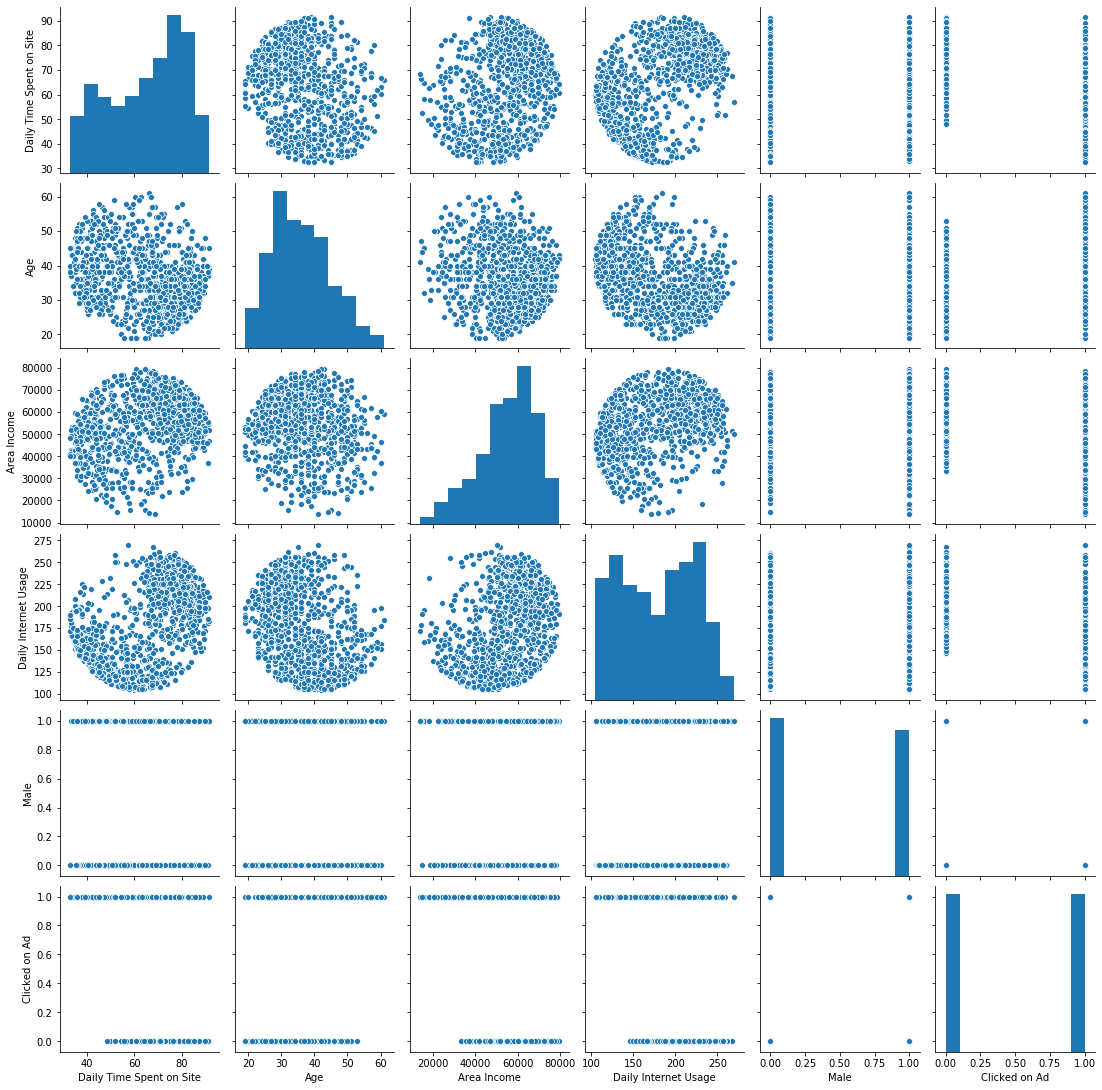

In [8]:
sns.pairplot(ads)#corelation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


In [10]:
#encide catogorical data
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [11]:

clfs = []
clfs.append(LogisticRegression())
clfs.append(GradientBoostingClassifier())
clfs.append(GaussianNB())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
fit_time  mean  0.02635345458984375
fit_time  std  0.010308952540483335
score_time  mean  0.0035565376281738283
score_time  std  0.0007956779271321031
test_score  mean  0.971641791044776
test_score  std  0.00558456326384172
---------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1

In [12]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
'clf__min_samples_leaf': param_range,
'clf__max_depth': param_range,
'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
'clf__C': param_range}]

In [13]:
pipeline.set_params(clf= LogisticRegression())
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [14]:
from sklearn.model_selection import GridSearchCV
cv_grid = GridSearchCV(estimator=pipeline, param_grid=grid_params_lr,scoring = 'accuracy',cv=10)

cv_grid.fit(X_train, y_train)

C:\Users\jmuwanguzi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jmuwanguzi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jmuwanguzi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jmuwanguzi\Anaconda

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('normalizer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
        

In [15]:
cv_grid.best_params_

{'clf__C': 0.5, 'clf__penalty': 'l2'}

In [16]:
cv_grid.best_estimator_

Pipeline(memory=None,
         steps=[('normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.5, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [17]:
cv_grid.best_score_

0.973134328358209

In [18]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 97.273%


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))#confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       162
           1       0.99      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.987


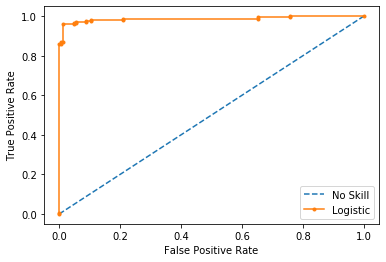

In [20]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
lr_probs = cv_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [21]:
import lime
import lime.lime_tabular


In [22]:
predict_fn_rf = lambda x: cv_grid.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Did Not','clicked on ad'],kernel_width=5)

In [24]:
X_test.loc[[737]]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
737,71.23,52,41521.28,122.59,0


In [25]:
choosen_instance = X_test.loc[[737]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [26]:
ads.loc[[737]]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
737,71.23,52,41521.28,122.59,Self-enabling zero administration neural-net,Ericksonmouth,0,Sweden,2016-01-05 11:53:17,1


In [27]:
explain

NameError: name 'explain' is not defined

In [ ]:
 #Save best grid search pipeline to file
from sklearn.externals import joblib
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(, dump_file, compress=1)


In [ ]:
import pickle
with open('best_gs_pipeline.pkl', 'wb') as file:
    pickle.dump(cv_grid, file)

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('best_gs_pipeline.pkl', 'rb'))

@app.route('/', methods=['GET', 'POST'])
def main():
    if flask.request.method == 'GET':
        return(flask.render_template('main.html'))
    if flask.request.method == 'POST':
        Daily_Time_Spent_on_Site = flask.request.form['Daily Time Spent on Site']
        Age=flask.request.form['Age']
        Area_Income = flask.request.form['Area Income']
        Daily_Internet_Usage = flask.request.form['Daily Internet Usage']
        Male = flask.request.form['Male']
        input_variables = pd.DataFrame([Daily_Time_Spent_on_Site, Age, Area_Income,Daily_Internet_Usage, Male],
                                       columns=['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male'],
                                       dtype=float)
        prediction = model.predict(input_variables)[0]
        return flask.render_template('main.html',
                                     original_input={'Daily Time Spent on Site':Daily_Time_Spent_on_Site,
                                                     'Age':Age,
                                                     'Area Income':Area_Income,
                                                     'Daily Internet Usage':Daily_Internet_Usage,
                                                     'Male':Male},
                                     result=prediction,
                                     )